<a href="https://colab.research.google.com/github/Masciel-Sevilla/modelos/blob/main/21/07/25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Paso 1: Descomprimir el dataset (esto solo se hace una vez)
import os
import zipfile

zip_path = '/content/Balanced.zip'
extract_path = '/content/'

# Solo descomprimir si no se ha hecho antes
if not os.path.exists(os.path.join(extract_path, 'Balanced')):
    print(f"Descomprimiendo {zip_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("¡Descompresión completada!")
else:
    print("La carpeta 'Balanced' ya existe. Omitiendo descompresión.")

Descomprimiendo /content/Balanced.zip...
¡Descompresión completada!


In [3]:
import tensorflow as tf

# Busca y lista los dispositivos físicos de tipo 'GPU'
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  try:
    # Opcional pero recomendado: Configura TensorFlow para que la memoria de la GPU no se asigne toda de golpe.
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)

    # Imprime un mensaje de éxito si se detectan GPUs
    print(f"✅ ¡Éxito! TensorFlow ha detectado {len(gpus)} GPU(s):")
    for i, gpu in enumerate(gpus):
        print(f"  - GPU {i}: {gpu.name}")

  except RuntimeError as e:
    # Este error puede ocurrir si las GPUs ya están en uso.
    print(f"⚠️ Error durante la configuración de la GPU: {e}")
else:
  print("❌ Error: TensorFlow no ha detectado ninguna GPU.")
  print("Asegúrate de haber activado el acelerador de GPU como se indica en el Paso 1.")

✅ ¡Éxito! TensorFlow ha detectado 1 GPU(s):
  - GPU 0: /physical_device:GPU:0


Creando datasets...
Se encontraron 1680 imágenes y 1680 máscaras de entrenamiento.
Se encontraron 210 imágenes y 210 máscaras de validación.
Entrenando modelo...
52606240/52606240 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Formas de las Características del Backbone (EfficientNetV2B3) ---
feat1_out (64x64): (None, 64, 64, 16)
feat2_out (32x32): (None, 32, 32, 64)
feat3_out (16x16): (None, 16, 16, 160)
feat4_out (8x8):   (None, 8, 8, 672)
feat5_out (4x4, entrada a ASPP): (None, 4, 4, 1536)
-------------------------------------------------------------------



Model: "EfficientWeedDetectionModel_V2B3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                      ┃ Output Shape                 ┃           Param # ┃ Connected to              
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ input_layer (InputLayer)          │ (None, 128, 128, 3)          │                 0 │ -                         
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ EfficientNetV2B3_Backbone         │ [(None, 64, 64, 16), (None,  │        12,930,622 │ input_layer[0][0]         
│ (Functional)                      │ 32, 32, 64), (None, 16, 16,  │                   │                           
│                                   │ 160), (None, 8, 8, 672),     │                   │                           
│                                   │ (None, 4, 4, 1536)]          │                   │                           
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ aspp_module (ASPPModule)          │ (None, 4, 4, 192)            │         8,741,376 │ EfficientNetV2B3_Backbone[
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ deformable_attention              │ (None, 4, 4, 192)            │            76,992 │ aspp_module[0][0]         
│ (DeformableAttention)             │                              │                   │                           
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ conv2d_transpose                  │ (None, 8, 8, 96)             │            73,728 │ deformable_attention[0][0]
│ (Conv2DTranspose)                 │                              │                   │                           
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ batch_normalization_8             │ (None, 8, 8, 96)             │               384 │ conv2d_transpose[0][0]    
│ (BatchNormalization)              │                              │                   │                           
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ conv2d_6 (Conv2D)                 │ (None, 8, 8, 96)             │            64,512 │ EfficientNetV2B3_Backbone[
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ re_lu_7 (ReLU)                    │ (None, 8, 8, 96)             │                 0 │ batch_normalization_8[0][0
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ batch_normalization_9             │ (None, 8, 8, 96)             │               384 │ conv2d_6[0][0]            
│ (BatchNormalization)              │                              │                   │                           
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ dropout_1 (Dropout)               │ (None, 8, 8, 96)             │                 0 │ re_lu_7[0][0]             
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ re_lu_8 (ReLU)                    │ (None, 8, 8, 96)             │                 0 │ batch_normalization_9[0][0
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ concatenate_2 (Concatenate)       │ (None, 8, 8, 192)            │                 0 │ dropout_1[0][0],          
│                                   │                              │                   │ re_lu_8[0][0]             
├───────────────────────────────────┼───────────────────

 Total params: 22,017,112 (83.99 MB)

 Trainable params: 21,903,240 (83.55 MB)

 Non-trainable params: 113,872 (444.81 KB)

Iniciando entrenamiento con EfficientWeedDetectionModel_V2B3 por 150 épocas...
Epoch 1/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.3259 - dice_coefficient: 0.0973 - iou_metric: 0.1953 - loss: 2.1828
Epoch 1: val_dice_coefficient improved from -inf to 0.09054, saving model to efficient_v2b3_weed_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 220s 395ms/step - accuracy: 0.3262 - dice_coefficient: 0.0973 - iou_metric: 0.1955 - loss: 2.1824 - val_accuracy: 0.5530 - val_dice_coefficient: 0.0905 - val_iou_metric: 0.3786 - val_loss: 2.1575 - learning_rate: 1.0000e-04
Epoch 2/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.4645 - dice_coefficient: 0.1138 - iou_metric: 0.3085 - loss: 2.0085
Epoch 2: val_dice_coefficient improved from 0.09054 to 0.09982, saving model to efficient_v2b3_weed_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 30s 213ms/step - accuracy: 0.4649 - dice_coefficient: 0.1139 - iou_metric: 0.3088 - loss: 2.0079 - val_accuracy: 0.7327 - val_dice_coefficient: 

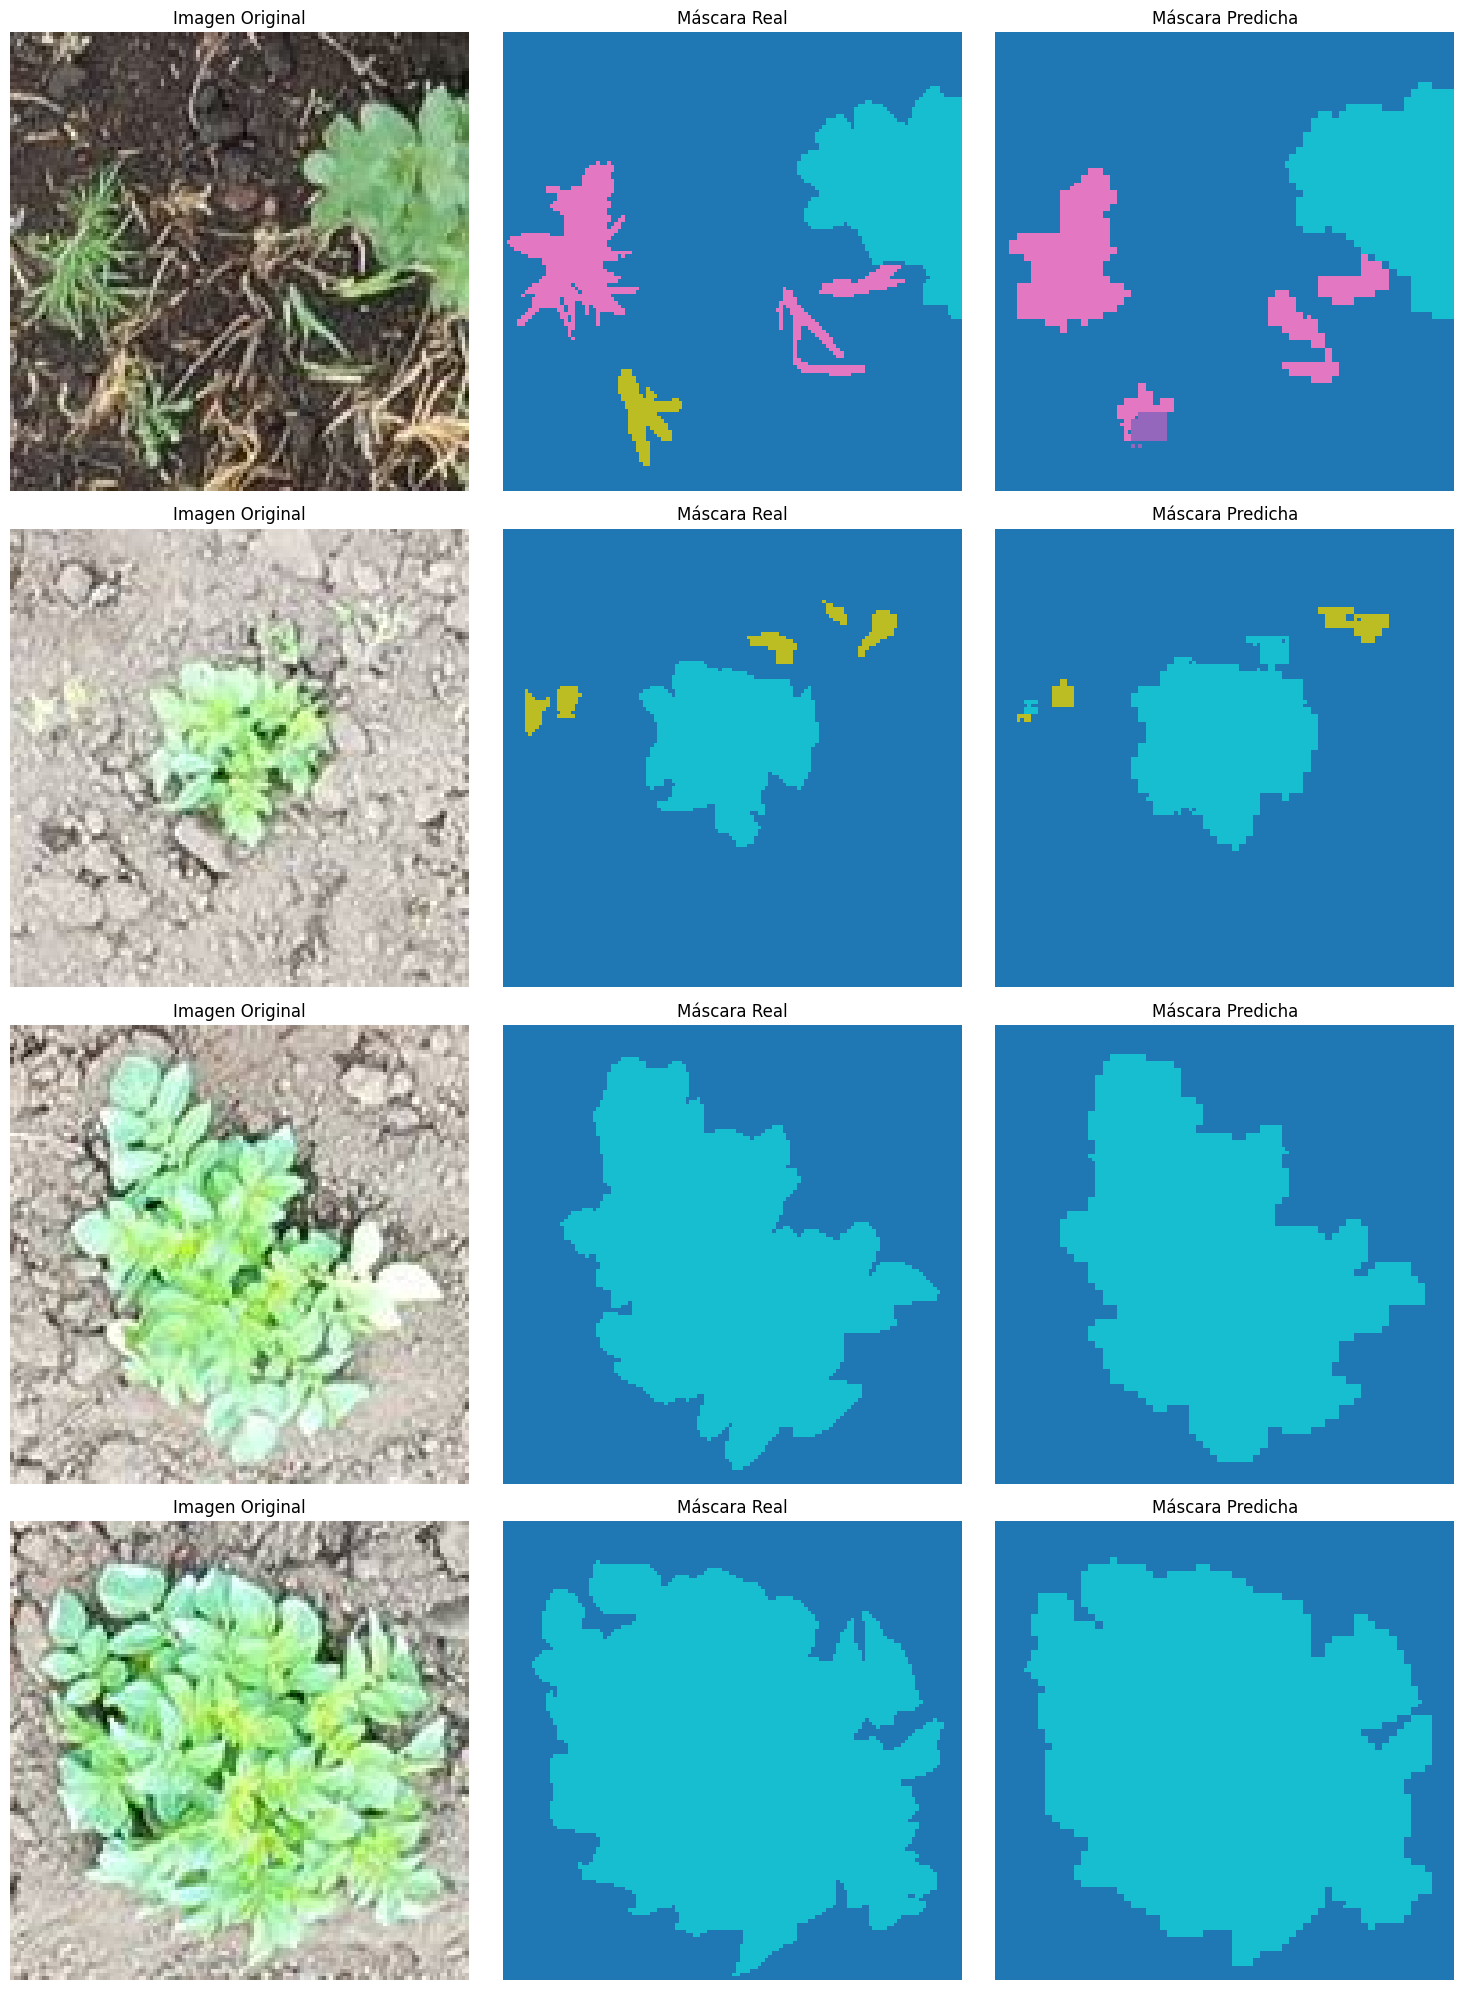

¡Entrenamiento completado! El mejor modelo se guardó como 'efficient_v2b3_weed_model.keras'


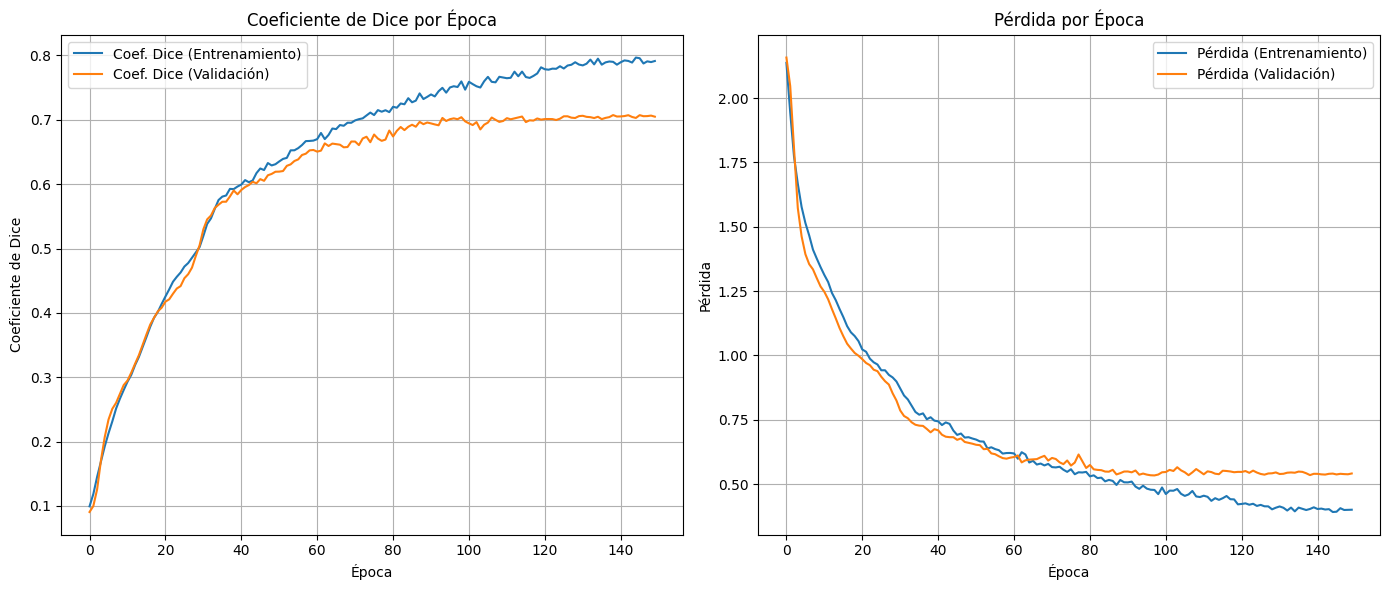


Evaluando el modelo final en el conjunto de validación:
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9599 - dice_coefficient: 0.7023 - iou_metric: 0.9249 - loss: 0.5794
Pérdida en Validación: 0.5353
Coeficiente de Dice en Validación: 0.7074
IoU en Validación: 0.9241
Accuracy en Validación: 0.9597

Calculando IoU por clase...
IoU para Fondo: 0.9475
IoU para Lengua de Vaca: 0.8893
IoU para Diente de León: 0.8933
IoU para Kikuyo: 0.8773
IoU para Otras: 0.6209
IoU para Papa: 0.8844


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

# --- Configuración del modelo ---
IMG_HEIGHT = 128
IMG_WIDTH = 128
NUM_CLASSES = 6   # 0-background, 1-Cow-tongue, 2-Dandelion, 3-Kikuyo, 4-Other, 5-Potato
BATCH_SIZE = 16  # Considera reducir el BATCH_SIZE a 8 si te da un error de memoria (OOM)
EPOCHS = 150
LEARNING_RATE = 1e-4

# --- Paths ---
BASE_PATH = './Balanced'
TRAIN_IMAGES_PATH = os.path.join(BASE_PATH, 'train/images')
TRAIN_MASKS_PATH = os.path.join(BASE_PATH, 'train/masks')
VAL_IMAGES_PATH = os.path.join(BASE_PATH, 'val/images')
VAL_MASKS_PATH = os.path.join(BASE_PATH, 'val/masks')

# --- Módulos del modelo (sin cambios) ---
class ASPPModule(layers.Layer):
    def __init__(self, filters=192, **kwargs):
        super(ASPPModule, self).__init__(**kwargs)
        self.filters = filters
        self.conv_1x1 = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_1x1 = layers.BatchNormalization()
        self.relu_1x1 = layers.ReLU()
        self.conv_3x3_6 = layers.Conv2D(filters, 3, padding='same', dilation_rate=6, use_bias=False)
        self.bn_3x3_6 = layers.BatchNormalization()
        self.relu_3x3_6 = layers.ReLU()
        self.conv_3x3_12 = layers.Conv2D(filters, 3, padding='same', dilation_rate=12, use_bias=False)
        self.bn_3x3_12 = layers.BatchNormalization()
        self.relu_3x3_12 = layers.ReLU()
        self.conv_3x3_18 = layers.Conv2D(filters, 3, padding='same', dilation_rate=18, use_bias=False)
        self.bn_3x3_18 = layers.BatchNormalization()
        self.relu_3x3_18 = layers.ReLU()
        self.global_avg_pool = layers.GlobalAveragePooling2D(keepdims=True)
        self.conv_1x1_gap = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_1x1_gap = layers.BatchNormalization()
        self.relu_1x1_gap = layers.ReLU()
        self.conv_final = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_final = layers.BatchNormalization()
        self.relu_final = layers.ReLU()
        self.dropout = layers.Dropout(0.2)

    def call(self, inputs, training=None):
        input_shape = tf.shape(inputs)
        conv_1x1 = self.relu_1x1(self.bn_1x1(self.conv_1x1(inputs), training=training))
        conv_3x3_6 = self.relu_3x3_6(self.bn_3x3_6(self.conv_3x3_6(inputs), training=training))
        conv_3x3_12 = self.relu_3x3_12(self.bn_3x3_12(self.conv_3x3_12(inputs), training=training))
        conv_3x3_18 = self.relu_3x3_18(self.bn_3x3_18(self.conv_3x3_18(inputs), training=training))
        gap = self.global_avg_pool(inputs)
        gap = self.relu_1x1_gap(self.bn_1x1_gap(self.conv_1x1_gap(gap), training=training))
        gap = tf.image.resize(gap, [input_shape[1], input_shape[2]], method='bilinear')
        concat = layers.Concatenate()([conv_1x1, conv_3x3_6, conv_3x3_12, conv_3x3_18, gap])
        output = self.relu_final(self.bn_final(self.conv_final(concat), training=training))
        output = self.dropout(output, training=training)
        return output

class DeformableAttention(layers.Layer):
    def __init__(self, filters, **kwargs):
        super(DeformableAttention, self).__init__(**kwargs)
        self.filters = filters

    def build(self, input_shape):
        self.attention_conv = layers.Conv2D(self.filters, 1, padding='same', activation='sigmoid', name='attention_weights_conv', use_bias=False)
        self.bn_attention = layers.BatchNormalization()
        self.feature_conv = layers.SeparableConv2D(self.filters, 3, padding='same', name='feature_processing_conv', use_bias=False)
        self.bn_feature = layers.BatchNormalization()
        self.relu_feature = layers.ReLU()
        super(DeformableAttention, self).build(input_shape)

    def call(self, inputs, training=None):
        attention_weights = self.bn_attention(self.attention_conv(inputs), training=training)
        features = self.relu_feature(self.bn_feature(self.feature_conv(inputs), training=training))
        attended_features = features * attention_weights
        return attended_features

# CAMBIO 1: Se usa EfficientNetV2B3.
def create_efficient_backbone(input_shape):
    base_model = tf.keras.applications.EfficientNetV2B3(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False
    )
    base_model.trainable = True

    # Los nombres de las capas para las conexiones de salto son los mismos para V2B2 y V2B3.
    layer_names = [
        'block1a_project_activation', # Salida: (N, 64, 64, 32)
        'block2a_expand_activation',  # Salida: (N, 32, 32, 56)
        'block3a_expand_activation',  # Salida: (N, 16, 16, 80)
        'block5a_expand_activation',  # Salida: (N, 8, 8, 192)
        'top_activation'              # Salida: (N, 4, 4, 1536)
    ]
    outputs = [base_model.get_layer(name).output for name in layer_names]
    return Model(inputs=base_model.input, outputs=outputs, name='EfficientNetV2B3_Backbone')

def create_weed_detection_model(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), num_classes=NUM_CLASSES):
    inputs = layers.Input(shape=input_shape)
    backbone = create_efficient_backbone(input_shape)

    feat1_out, feat2_out, feat3_out, feat4_out, feat5_out = backbone(inputs)

    print(f"\n--- Formas de las Características del Backbone (EfficientNetV2B3) ---")
    print(f"feat1_out (64x64): {feat1_out.shape}")
    print(f"feat2_out (32x32): {feat2_out.shape}")
    print(f"feat3_out (16x16): {feat3_out.shape}")
    print(f"feat4_out (8x8):   {feat4_out.shape}")
    print(f"feat5_out (4x4, entrada a ASPP): {feat5_out.shape}")
    print(f"-------------------------------------------------------------------\n")

    deep_features = feat5_out
    aspp_filters = 192
    aspp_features = ASPPModule(filters=aspp_filters)(deep_features)
    attended_features = DeformableAttention(filters=aspp_filters)(aspp_features)

    # --- Ruta del Decodificador (la lógica se mantiene) ---
    decoder_up1 = layers.Conv2DTranspose(96, 2, strides=2, padding='same', use_bias=False)(attended_features)
    decoder_up1 = layers.BatchNormalization()(decoder_up1)
    decoder_up1 = layers.ReLU()(decoder_up1)
    decoder_up1 = layers.Dropout(0.2)(decoder_up1)

    feat4_processed = layers.Conv2D(96, 1, padding='same', use_bias=False)(feat4_out)
    feat4_processed = layers.BatchNormalization()(feat4_processed)
    feat4_processed = layers.ReLU()(feat4_processed)
    decoder_concat_8x8 = layers.Concatenate()([decoder_up1, feat4_processed])
    decoder_conv_8x8 = layers.SeparableConv2D(96, 3, padding='same', use_bias=False)(decoder_concat_8x8)
    decoder_conv_8x8 = layers.BatchNormalization()(decoder_conv_8x8)
    decoder_conv_8x8 = layers.ReLU()(decoder_conv_8x8)
    decoder_conv_8x8 = layers.Dropout(0.2)(decoder_conv_8x8)

    decoder_up2 = layers.Conv2DTranspose(96, 2, strides=2, padding='same', use_bias=False)(decoder_conv_8x8)
    decoder_up2 = layers.BatchNormalization()(decoder_up2)
    decoder_up2 = layers.ReLU()(decoder_up2)
    decoder_up2 = layers.Dropout(0.2)(decoder_up2)
    feat3_processed = layers.Conv2D(96, 1, padding='same', use_bias=False)(feat3_out)
    feat3_processed = layers.BatchNormalization()(feat3_processed)
    feat3_processed = layers.ReLU()(feat3_processed)
    decoder_concat_16x16 = layers.Concatenate()([decoder_up2, feat3_processed])
    decoder_conv_16x16 = layers.SeparableConv2D(96, 3, padding='same', use_bias=False)(decoder_concat_16x16)
    decoder_conv_16x16 = layers.BatchNormalization()(decoder_conv_16x16)
    decoder_conv_16x16 = layers.ReLU()(decoder_conv_16x16)
    decoder_conv_16x16 = layers.Dropout(0.2)(decoder_conv_16x16)

    decoder_up3 = layers.Conv2DTranspose(48, 2, strides=2, padding='same', use_bias=False)(decoder_conv_16x16)
    decoder_up3 = layers.BatchNormalization()(decoder_up3)
    decoder_up3 = layers.ReLU()(decoder_up3)
    decoder_up3 = layers.Dropout(0.2)(decoder_up3)
    feat2_processed = layers.Conv2D(48, 1, padding='same', use_bias=False)(feat2_out)
    feat2_processed = layers.BatchNormalization()(feat2_processed)
    feat2_processed = layers.ReLU()(feat2_processed)
    decoder_concat_32x32 = layers.Concatenate()([decoder_up3, feat2_processed])
    decoder_conv_32x32 = layers.SeparableConv2D(48, 3, padding='same', use_bias=False)(decoder_concat_32x32)
    decoder_conv_32x32 = layers.BatchNormalization()(decoder_conv_32x32)
    decoder_conv_32x32 = layers.ReLU()(decoder_conv_32x32)
    decoder_conv_32x32 = layers.Dropout(0.2)(decoder_conv_32x32)

    decoder_up4 = layers.Conv2DTranspose(24, 2, strides=2, padding='same', use_bias=False)(decoder_conv_32x32)
    decoder_up4 = layers.BatchNormalization()(decoder_up4)
    decoder_up4 = layers.ReLU()(decoder_up4)
    decoder_up4 = layers.Dropout(0.2)(decoder_up4)
    feat1_processed = layers.Conv2D(24, 1, padding='same', use_bias=False)(feat1_out)
    feat1_processed = layers.BatchNormalization()(feat1_processed)
    feat1_processed = layers.ReLU()(feat1_processed)
    decoder_concat_64x64 = layers.Concatenate()([decoder_up4, feat1_processed])
    decoder_conv_64x64 = layers.SeparableConv2D(24, 3, padding='same', use_bias=False)(decoder_concat_64x64)
    decoder_conv_64x64 = layers.BatchNormalization()(decoder_conv_64x64)
    decoder_conv_64x64 = layers.ReLU()(decoder_conv_64x64)
    decoder_conv_64x64 = layers.Dropout(0.2)(decoder_conv_64x64)

    outputs = layers.Conv2DTranspose(NUM_CLASSES, 2, strides=2, padding='same', use_bias=False)(decoder_conv_64x64)
    outputs = layers.Conv2D(NUM_CLASSES, 1, padding='same', activation='softmax', name='segmentation_output')(outputs)

    model = Model(inputs=inputs, outputs=outputs, name='EfficientWeedDetectionModel_V2B3')
    return model

# --- Métricas y Funciones de Pérdida (sin cambios) ---
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.reshape(tf.cast(y_true, tf.float32), [-1, NUM_CLASSES])
    y_pred_f = tf.reshape(tf.cast(y_pred, tf.float32), [-1, NUM_CLASSES])
    intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    dice_scores = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0) + smooth)
    return tf.reduce_mean(dice_scores)

def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
        return loss
    return focal_loss_fixed

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def combined_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    class_weights = tf.constant([0.4, 4.0, 3.5, 1.0, 2.0, 4.0])
    f_loss_per_pixel_per_class = focal_loss(gamma=2.0, alpha=0.75)(y_true, y_pred)
    weighted_f_loss = f_loss_per_pixel_per_class * class_weights
    f_loss_reduced = tf.reduce_sum(weighted_f_loss, axis=-1)
    f_loss_mean = tf.reduce_mean(f_loss_reduced)
    d_loss = dice_loss(y_true, y_pred)
    return f_loss_mean + (1.5 * d_loss)

def iou_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.one_hot(tf.argmax(y_pred, axis=-1), depth=NUM_CLASSES)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3]) - intersection
    iou = tf.where(tf.equal(union, 0), 1.0, intersection / union)
    return tf.reduce_mean(iou)

def iou_per_class(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.one_hot(tf.argmax(y_pred, axis=-1), depth=NUM_CLASSES)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
    union = tf.reduce_sum(y_true, axis=[1, 2]) + tf.reduce_sum(y_pred, axis=[1, 2]) - intersection
    iou = tf.where(tf.equal(union, 0), 1.0, intersection / union)
    return tf.reduce_mean(iou, axis=0)

# --- Carga y Preprocesamiento de Datos ---
def load_and_preprocess_data(train_img_path, train_msk_path, val_img_path, val_msk_path):
    def load_image_only(image_path):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3, expand_animations=False)
        image.set_shape([None, None, 3])
        image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH], method='bilinear')
        return tf.cast(image, tf.float32)

    def load_mask_only(mask_path):
        mask = tf.io.read_file(mask_path)
        mask = tf.image.decode_png(mask, channels=1)
        mask = tf.image.resize(mask, [IMG_HEIGHT, IMG_WIDTH], method='nearest')
        mask = tf.cast(mask, tf.int32)
        mask = tf.squeeze(mask, axis=-1)
        mask = tf.one_hot(mask, NUM_CLASSES)
        return mask

    def augment_and_preprocess(image, mask):
        if tf.random.uniform([]) > 0.5: image = tf.image.flip_left_right(image); mask = tf.image.flip_left_right(mask)
        if tf.random.uniform([]) > 0.5: image = tf.image.flip_up_down(image); mask = tf.image.flip_up_down(mask)
        if tf.random.uniform([]) > 0.5: k = tf.random.uniform([], 1, 4, tf.int32); image = tf.image.rot90(image, k); mask = tf.image.rot90(mask, k)
        image = tf.image.random_brightness(image, max_delta=0.4 * 255)
        image = tf.image.random_contrast(image, lower=0.6, upper=1.4)
        image = tf.image.random_hue(image, max_delta=0.15)
        image = tf.image.random_saturation(image, lower=0.6, upper=1.4)
        image = tf.clip_by_value(image, 0.0, 255.0)
        image = tf.keras.applications.efficientnet_v2.preprocess_input(image)
        return image, mask

    train_image_paths = sorted(glob(os.path.join(train_img_path, '*.jpg')))
    train_mask_paths = sorted(glob(os.path.join(train_msk_path, '*.png')))
    val_image_paths = sorted(glob(os.path.join(val_img_path, '*.jpg')))
    val_mask_paths = sorted(glob(os.path.join(val_msk_path, '*.png')))

    if not train_image_paths or not train_mask_paths: raise FileNotFoundError(f"No se encontraron archivos en las rutas de entrenamiento: {train_img_path}, {train_msk_path}")
    if not val_image_paths or not val_mask_paths: raise FileNotFoundError(f"No se encontraron archivos en las rutas de validación: {val_img_path}, {val_msk_path}")

    print(f"Se encontraron {len(train_image_paths)} imágenes y {len(train_mask_paths)} máscaras de entrenamiento.")
    print(f"Se encontraron {len(val_image_paths)} imágenes y {len(val_mask_paths)} máscaras de validación.")

    train_ds = tf.data.Dataset.zip((
        tf.data.Dataset.from_tensor_slices(train_image_paths).map(load_image_only, tf.data.AUTOTUNE),
        tf.data.Dataset.from_tensor_slices(train_mask_paths).map(load_mask_only, tf.data.AUTOTUNE)
    )).shuffle(1000).map(augment_and_preprocess, tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    val_ds = tf.data.Dataset.zip((
        tf.data.Dataset.from_tensor_slices(val_image_paths).map(load_image_only, tf.data.AUTOTUNE),
        tf.data.Dataset.from_tensor_slices(val_mask_paths).map(load_mask_only, tf.data.AUTOTUNE)
    )).map(lambda img, msk: (tf.keras.applications.efficientnet_v2.preprocess_input(img), msk), tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    return train_ds, val_ds

def train_model(train_dataset, val_dataset, model_save_path='efficient_v2b3_weed_model.keras'):
    model = create_weed_detection_model()
    model.summary(line_length=120)
    optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE, weight_decay=1e-5)
    model.compile(optimizer=optimizer, loss=combined_loss, metrics=[dice_coefficient, iou_metric, 'accuracy'])
    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(model_save_path, monitor='val_dice_coefficient', save_best_only=True, mode='max', verbose=1),
        tf.keras.callbacks.EarlyStopping(monitor='val_dice_coefficient', patience=50, mode='max', restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=20, min_lr=1e-7, verbose=1),
    ]
    print(f"Iniciando entrenamiento con {model.name} por {EPOCHS} épocas...")
    history = model.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset, callbacks=callbacks, verbose=1)
    return model, history

def visualize_predictions(model, val_dataset, num_samples=4):
    print(f"Visualizando {num_samples} muestras del conjunto de validación...")
    for images, masks in val_dataset.take(1):
        predictions = model.predict(images)
        fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))

        for i in range(min(num_samples, images.shape[0])):
            proc_image = images[i].numpy()
            min_val, max_val = proc_image.min(), proc_image.max()
            if max_val == min_val:
                original_image = np.full(proc_image.shape, min_val, dtype=np.uint8)
            else:
                original_image = (proc_image - min_val) / (max_val - min_val) * 255
            original_image = original_image.astype(np.uint8)

            axes[i, 0].imshow(original_image)
            axes[i, 0].set_title('Imagen Original')
            axes[i, 0].axis('off')

            true_mask = np.argmax(masks[i].numpy(), axis=-1)
            axes[i, 1].imshow(true_mask, cmap='tab10', vmin=0, vmax=NUM_CLASSES - 1)
            axes[i, 1].set_title('Máscara Real')
            axes[i, 1].axis('off')

            pred_mask = np.argmax(predictions[i], axis=-1)
            axes[i, 2].imshow(pred_mask, cmap='tab10', vmin=0, vmax=NUM_CLASSES - 1)
            axes[i, 2].set_title('Máscara Predicha')
            axes[i, 2].axis('off')

        plt.tight_layout()
        plt.show()
        break

if __name__ == "__main__":
    for path in [TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, VAL_IMAGES_PATH, VAL_MASKS_PATH]:
        if not os.path.exists(path):
            print(f"Advertencia: La ruta de datos no existe: {path}")
            print(f"Creando directorio: {path}")
            os.makedirs(path, exist_ok=True)

    try:
        print("Creando datasets...")
        train_ds, val_ds = load_and_preprocess_data(TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, VAL_IMAGES_PATH, VAL_MASKS_PATH)

        if not any(True for _ in train_ds.take(1)):
            print("\nError: El dataset de entrenamiento está vacío.")
            print("Asegúrate de que las imágenes y máscaras estén en las rutas correctas.")
            exit()

        print("Entrenando modelo...")
        # CAMBIO 2: Actualizar el nombre del modelo guardado.
        model_save_path = 'efficient_v2b3_weed_model.keras'
        model, history = train_model(train_ds, val_ds, model_save_path=model_save_path)

        print("\nVisualizando predicciones del mejor modelo...")
        visualize_predictions(model, val_ds)

        print(f"¡Entrenamiento completado! El mejor modelo se guardó como '{model_save_path}'")

        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['dice_coefficient'], label='Coef. Dice (Entrenamiento)')
        plt.plot(history.history['val_dice_coefficient'], label='Coef. Dice (Validación)')
        plt.title('Coeficiente de Dice por Época')
        plt.xlabel('Época')
        plt.ylabel('Coeficiente de Dice')
        plt.legend()
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Pérdida (Entrenamiento)')
        plt.plot(history.history['val_loss'], label='Pérdida (Validación)')
        plt.title('Pérdida por Época')
        plt.xlabel('Época')
        plt.ylabel('Pérdida')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print("\nEvaluando el modelo final en el conjunto de validación:")
        final_metrics = model.evaluate(val_ds)
        print(f"Pérdida en Validación: {final_metrics[0]:.4f}")
        print(f"Coeficiente de Dice en Validación: {final_metrics[1]:.4f}")
        print(f"IoU en Validación: {final_metrics[2]:.4f}")
        print(f"Accuracy en Validación: {final_metrics[3]:.4f}")

        print("\nCalculando IoU por clase...")
        iou_per_class_values = []
        for images_batch, masks_batch in val_ds:
            predictions_batch = model.predict(images_batch, verbose=0)
            iou_per_class_values.append(iou_per_class(masks_batch, predictions_batch))

        mean_iou_per_class = tf.reduce_mean(tf.stack(iou_per_class_values), axis=0).numpy()

        class_names = ['Fondo', 'Lengua de Vaca', 'Diente de León', 'Kikuyo', 'Otras', 'Papa']
        for i, iou in enumerate(mean_iou_per_class):
            print(f"IoU para {class_names[i]}: {iou:.4f}")

    except FileNotFoundError as e:
        print(f"\nError de archivo no encontrado: {e}")
    except Exception as e:
        print(f"\nOcurrió un error inesperado: {e}")